In [2]:
'''Load Dataset'''
import numpy as np
import matplotlib.pyplot as plt 
import warnings
from tslearn.datasets import UCR_UEA_datasets
warnings.filterwarnings('ignore')




In [3]:
dataset='UWaveGestureLibrary'
X_train,train_y,X_test,test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x=X_train.reshape(-1,X_train.shape[-1],X_train.shape[-2])
test_x=X_test.reshape(-1,X_train.shape[-1],X_train.shape[-2])


In [4]:
import sklearn
import torch
from models.CNN_TSNet import UCRDataset
from models.ResNet import ResNetBaseline, fit, get_all_preds
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import pickle
enc1=pickle.load(open(f'./models/{dataset}/OneHotEncoder.pkl','rb'))
test_y=enc1.transform(test_y.reshape(-1,1))
train_y=enc1.transform(train_y.reshape(-1,1))

n_pred_classes =train_y.shape[1]
 
train_dataset = UCRDataset(train_x.astype(np.float64),train_y.astype(np.int64))
test_dataset = UCRDataset(test_x.astype(np.float64),test_y.astype(np.int64))
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1,shuffle=False)

model = ResNetBaseline(in_channels=train_x.shape[-2], num_pred_classes=n_pred_classes)

In [5]:
model.load_state_dict(torch.load(f'./models/{dataset}/ResNet'))
observation_01, label_01 = test_dataset[0]

In [6]:
from TSEvo.CounterfactualExplanation import Explanation
exp =Explanation(model= model,data=(test_x,test_y), backend='torch')

y was one Hot Encoded


In [7]:
#pop,logbook=exp.explain_instance(observation_01,np.array([[1,0]]))
pop,logbook=exp.explain_instance(observation_01,np.array([label_01]),transformer='mutate_both')#, transformer='frequency_band_mapping') 

Reference Set not Target
y (320,)
y [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
original (1, 8)
0
ReferenceSet class [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [8]:
# extract statistics:
meanYDistance = logbook.chapters['stats_y_distance'].select("min")
#logbook.chapters['stats_y_distance','stats_x_distance','stats_changed_features','stats_gower'].select("avg")
meanXDistance = logbook.chapters['stats_x_distance'].select("min")
meanChanged = logbook.chapters['stats_changed_features'].select("min")
meanGower = logbook.chapters['stats_gower'].select("min")

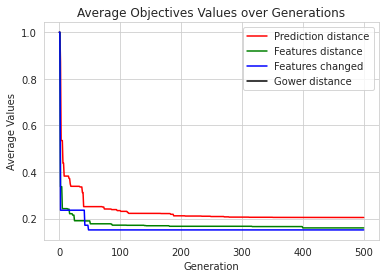

In [9]:
# plot statistics:
sns.set_style("whitegrid")
plt.plot(meanYDistance, color='red', label='Prediction distance')
plt.plot(meanXDistance, color='green', label='Features distance')
plt.plot(meanChanged, color='blue', label='Features changed')
plt.plot(meanGower, color='black', label='Gower distance')
plt.xlabel('Generation')
plt.ylabel('Average Values')
plt.title('Average Objectives Values over Generations')
plt.set_loglevel
plt.legend()
plt.show() 

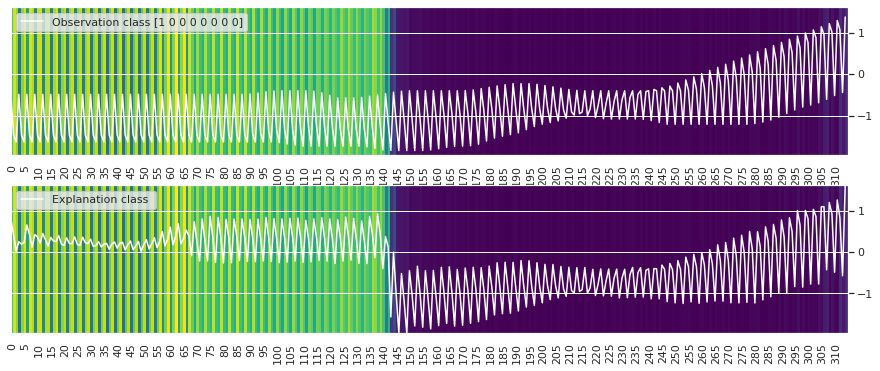

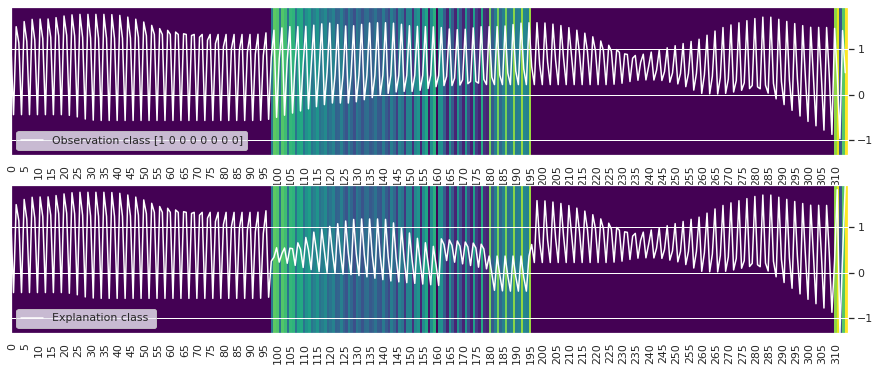

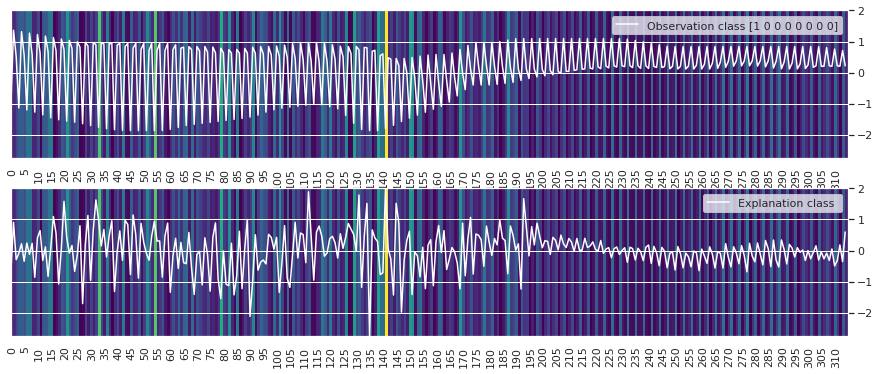

In [10]:
from evaluation.Plots import plot_CF_Original

i=0
for line in np.array(pop[0]):
    plot_CF_Original(line, observation_01[i],label_01)
    i=i+1